In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS, dest='/media/xar/barracuda1/fast.ai/data/')
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(seed=42),
                get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                item_tfms=Resize(460),
                batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

min/10: 1.00e-02, steepest: 5.25e-03


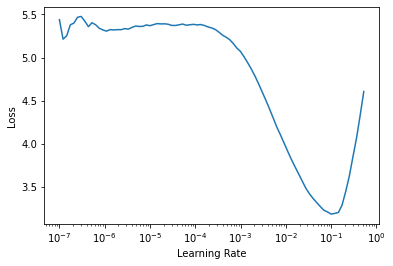

In [3]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print('min/10: {:.2e}, steepest: {:.2e}'.format(lr_min, lr_steep))

In [4]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.683030,0.335028,0.111637,00:30
1,0.654540,0.273706,0.092693,00:32
2,0.425887,0.261430,0.092693,00:32


SuggestedLRs(lr_min=5.248074739938602e-06, lr_steep=9.12010818865383e-07)

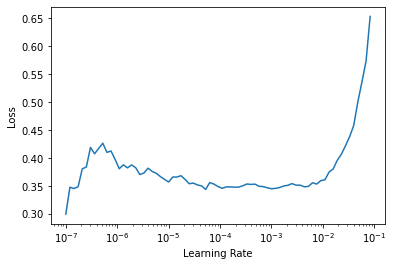

In [5]:
learn.lr_find()

In [6]:
learn.unfreeze()
learn.fit_one_cycle(6, lr_max=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.378710,0.279592,0.095399,00:38
1,0.381793,0.373781,0.114344,00:40
2,0.286660,0.254250,0.077808,00:40
3,0.198500,0.228832,0.073748,00:40
4,0.136563,0.206792,0.066306,00:40
5,0.117283,0.212449,0.070365,00:40


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.3182567499825382e-06)

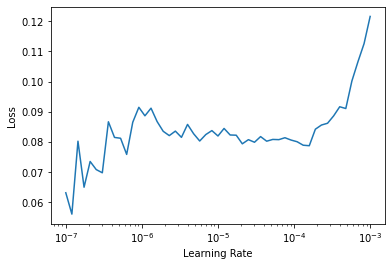

In [7]:
learn.lr_find()

In [8]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.105013,0.205668,0.067659,00:38
1,0.093496,0.204238,0.060893,00:40
2,0.096263,0.203520,0.062246,00:40
3,0.088221,0.200999,0.060893,00:40
4,0.079543,0.199939,0.058187,00:40
5,0.078775,0.200420,0.063599,00:40


In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.716062,0.341412,0.106225,00:30
1,0.676594,0.250878,0.086604,00:32
2,0.428336,0.240789,0.080514,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.366062,0.239347,0.077808,00:40
1,0.350250,0.233419,0.077808,00:40
2,0.345819,0.227420,0.077808,00:40
3,0.291048,0.223123,0.069689,00:40
4,0.277014,0.215911,0.069689,00:40
5,0.226429,0.216887,0.069689,00:40
6,0.198850,0.204524,0.066982,00:40
7,0.206486,0.202684,0.065629,00:40
8,0.193744,0.204737,0.062246,00:40
9,0.170904,0.196410,0.062246,00:40


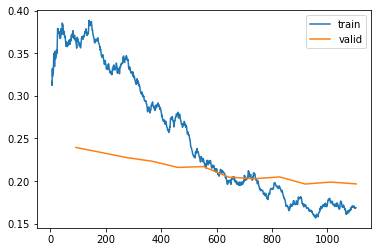

In [10]:
learn.recorder.plot_loss()

In [2]:
#from fastai2.callback.fp16 import*
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/xar/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.297212,0.299955,0.098106,00:52
1,0.574006,0.290225,0.096752,00:53
2,0.404804,0.302328,0.082544,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.257314,0.293240,0.081867,01:10
1,0.314805,0.323585,0.096076,01:10
2,0.247195,0.339684,0.093369,01:10
3,0.156743,0.251171,0.075778,01:09
4,0.093831,0.228620,0.060893,01:10
5,0.053697,0.217960,0.061570,01:10


SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0012022644514217973)

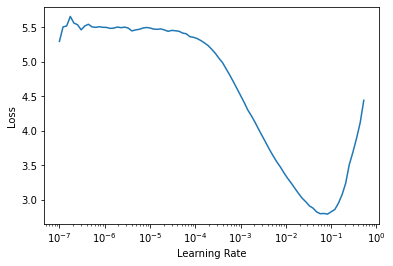

In [3]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.lr_find()

In [4]:
learn.fit_one_cycle(3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-3))
learn.recorder.plot_loss()

epoch,train_loss,valid_loss,error_rate,time
0,1.051869,0.279024,0.092693,00:50
1,0.453182,0.224751,0.076455,00:54
2,0.271064,0.207218,0.064953,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.196328,0.196273,0.058863,01:10
1,0.243315,0.242058,0.071719,01:10
2,0.236757,0.240190,0.072395,01:10
3,0.193399,0.241408,0.070365,01:09
4,0.139455,0.216514,0.064276,01:09
5,0.115733,0.222613,0.061570,01:10
6,0.086562,0.214279,0.062923,01:10
7,0.066596,0.213930,0.054804,01:10
8,0.045718,0.211731,0.054127,01:09
9,0.039323,0.199656,0.050068,01:09


epoch,train_loss,valid_loss,error_rate,time
0,1.167603,0.285222,0.088633,01:22
1,0.533299,0.279497,0.089310,01:24
2,0.391451,0.258731,0.082544,01:23


epoch,train_loss,valid_loss,error_rate,time
0,0.223314,0.195003,0.054127,01:51
1,0.202593,0.273891,0.085250,01:51
2,0.252743,0.373744,0.101489,01:51
3,0.232758,0.337375,0.085250,01:51
4,0.201791,0.292183,0.079161,01:51
5,0.134762,0.324044,0.087957,01:51
6,0.104928,0.320430,0.082544,01:51
7,0.079531,0.276200,0.066306,01:51
8,0.046301,0.250329,0.065629,01:51
9,0.028623,0.251705,0.057510,01:51


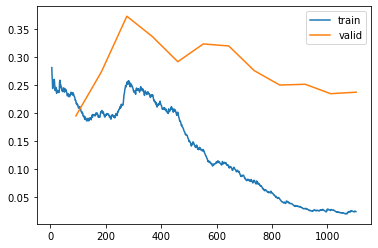

In [8]:
## resnet101
learn = cnn_learner(dls, resnet101, metrics=error_rate).to_fp16()
learn.fine_tune(12, freeze_epochs=3)
learn.recorder.plot_loss()

epoch,train_loss,valid_loss,error_rate,time
0,1.144058,0.264103,0.086604,01:55
1,0.500969,0.272430,0.079838,01:55
2,0.359917,0.232247,0.070365,01:55


epoch,train_loss,valid_loss,error_rate,time
0,0.201608,0.205349,0.067659,02:35
1,0.180990,0.256214,0.079161,02:35
2,0.258356,0.376310,0.098106,02:35
3,0.260759,0.349351,0.096752,02:35
4,0.199674,0.333514,0.082544,02:35
5,0.148750,0.300895,0.076455,02:35
6,0.105236,0.307146,0.079161,02:35
7,0.065925,0.259931,0.060893,02:35
8,0.044316,0.249879,0.065629,02:35
9,0.033607,0.235022,0.062246,02:35


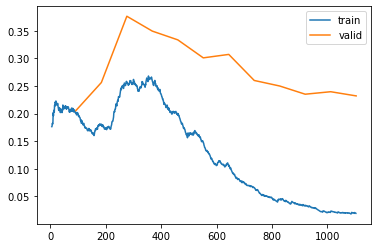

In [10]:
## resnet 152
learn = cnn_learner(dls, resnet152, metrics=error_rate).to_fp16()
learn.fine_tune(12, freeze_epochs=3)
learn.recorder.plot_loss()